In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_simple
import ariel_gp
import ariel_load
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
kgs.debugging_mode = 1

local


In [2]:
train_data = kgs.load_all_train_data()
train_data = train_data[:100]

In [3]:
todo = dict()

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
todo['Baseline GP'] = model

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
for ii in range(2):
    model.model.starter_model.loaders[ii].apply_full_sensor_corrections.remove_background_remove_used_rows = False
    model.model.starter_model.loaders[ii].apply_wavelength_binning = ariel_load.ApplyWavelengthBinning2()
model.model.starter_model.loaders[0].apply_wavelength_binning.options.n_components = 4
model.model.starter_model.loaders[1].apply_wavelength_binning.options.n_components = 3
todo['New preprocessing'] = model

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
for ii in range(2):
    loaders[ii].apply_full_sensor_corrections.use_pca_for_background_removal = True
todo['New mean removal'] = model

# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# model.model.run_in_parallel = True
# for ii in range(2):
#     model.model.starter_model.loaders[ii].apply_pixel_corrections.poke_holes = True
# todo['Baseline GP, holes'] = model

# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# model.model.run_in_parallel = True
# for ii in range(2):
#     model.model.starter_model.loaders[ii].apply_full_sensor_corrections.remove_background_remove_used_rows = False
#     model.model.starter_model.loaders[ii].apply_wavelength_binning = ariel_load.ApplyWavelengthBinning2()
# model.model.starter_model.loaders[0].apply_wavelength_binning.options.n_components = 4
# model.model.starter_model.loaders[1].apply_wavelength_binning.options.n_components = 3
# for ii in range(2):
#     model.model.starter_model.loaders[ii].apply_pixel_corrections.poke_holes = True
# todo['New preprocessing, holes'] = model

In [4]:
kgs.sanity_checks_active = False
def fname(k):
    return kgs.temp_dir + 'evaluate_model_'+k+'__'+str(len(train_data))+'.pickle'
for k,v in todo.items():
    if not os.path.isfile(fname(k)):
        print(k)
        model = copy.deepcopy(v)
        
        # Precache data
        for d in tqdm(train_data):
            copy.deepcopy(d).load_to_step(5,model.model.starter_model.loaders)
        
        
        model.train(train_data)
        inferred_data = model.infer(train_data)
        print(k)
        kgs.score_metric(inferred_data, train_data)
        kgs.dill_save(fname(k), (inferred_data,model,kgs.git_commit_id))
    else:
        print(k)
        (inferred_data,model,_) = kgs.dill_load(fname(k))
        kgs.score_metric(inferred_data, train_data)

Baseline GP
Score:          0.5804
RMS error FGS:  154.30 ppm
RMS error AIRS: 111.64 ppm
New preprocessing


Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [09:12<00:00,  5.52s/it]


local
SpawnPoolWorker-1 1
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-2 2
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-3 3
CUDA_VISIBLE_DEVICES= 0
Opt time 43.21910238265991
New preprocessing
Score:          0.5447
RMS error FGS:  137.79 ppm
RMS error AIRS: 161.99 ppm
Baseline GP, holes


Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [09:12<00:00,  5.53s/it]


local
SpawnPoolWorker-6 6
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-5 5
CUDA_VISIBLE_DEVICES= 0
Opt time 63.930967807769775
Baseline GP, holes
Score:          0.3385
RMS error FGS:  1073.31 ppm
RMS error AIRS: 449.81 ppm
New preprocessing, holes


Processing in parallel: 100%|█████████████████████████████████████████████████████████| 100/100 [09:18<00:00,  5.58s/it]


local
SpawnPoolWorker-8 8
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-7 7
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-9 9
CUDA_VISIBLE_DEVICES= 0
Opt time 90.41267919540405
New preprocessing, holes
Score:          0.3351
RMS error FGS:  989.25 ppm
RMS error AIRS: 481.24 ppm


Baseline GP
[0.9998521898503154, 1.0036631997393033]
[6.706344053778392e-05, 3.271786959111227e-05]
[1.6177107825641548, 1.745254643267295]
Score:          0.5804
RMS error FGS:  154.30 ppm
RMS error AIRS: 111.64 ppm

20
Score:          0.5966
RMS error FGS:  126.37 ppm
RMS error AIRS: 83.29 ppm

No fudge
Score:          0.5228
RMS error FGS:  154.30 ppm
RMS error AIRS: 111.64 ppm


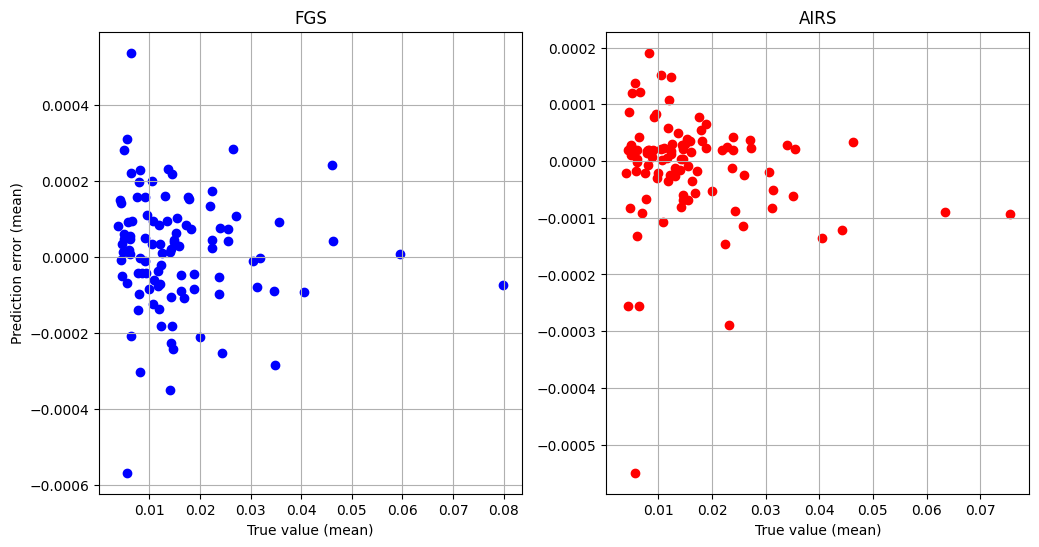

FGS
94572221, ratio:7.091, x:7.751e-05, y:-5.496e-04, RMS:5.498e-04
229071424, ratio:2.038, x:1.253e-04, y:-2.552e-04, RMS:2.554e-04
83845482, ratio:2.003, x:1.443e-04, y:-2.890e-04, RMS:3.036e-04
201609580, ratio:1.490, x:1.282e-04, y:1.910e-04, RMS:2.027e-04
39930063, ratio:1.418, x:9.740e-05, y:1.381e-04, RMS:1.407e-04
AIRS
94572221, ratio:12.486, x:4.402e-05, y:-5.496e-04, RMS:5.498e-04
229071424, ratio:4.010, x:6.365e-05, y:-2.552e-04, RMS:2.554e-04
83845482, ratio:3.406, x:8.485e-05, y:-2.890e-04, RMS:3.036e-04
291916399, ratio:2.789, x:4.351e-05, y:1.213e-04, RMS:1.395e-04
309219968, ratio:2.696, x:3.974e-05, y:1.071e-04, RMS:1.076e-04


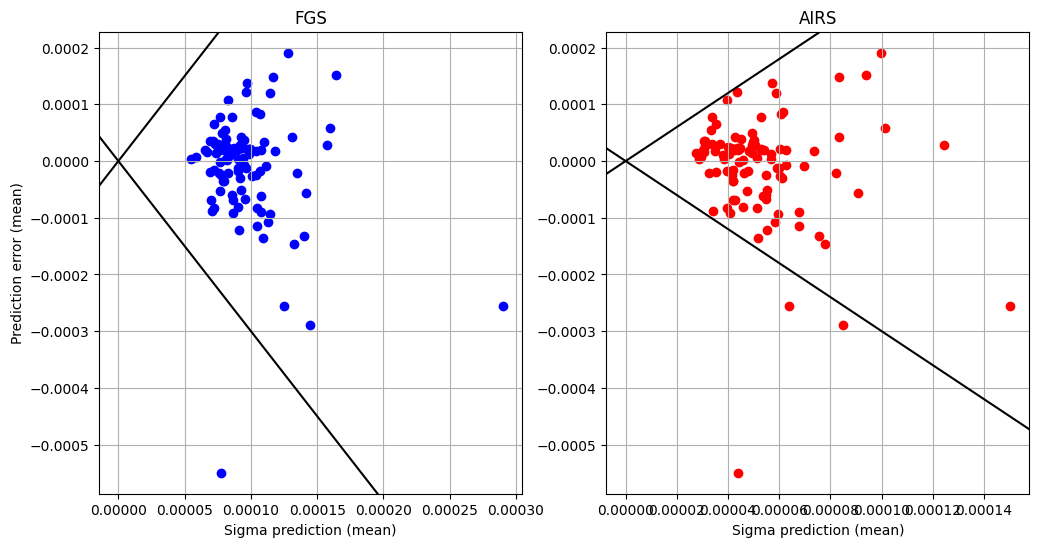

AIRS variation
199812582, ratio:2.881, x:1.392e-05, y:4.011e-05, RMS:5.298e-05
255788262, ratio:2.419, x:1.572e-05, y:3.803e-05, RMS:4.585e-05
204264160, ratio:2.341, x:8.915e-05, y:2.087e-04, RMS:2.282e-04
233844444, ratio:2.255, x:1.443e-05, y:3.254e-05, RMS:3.689e-05
93251999, ratio:2.187, x:1.462e-05, y:3.198e-05, RMS:4.407e-05


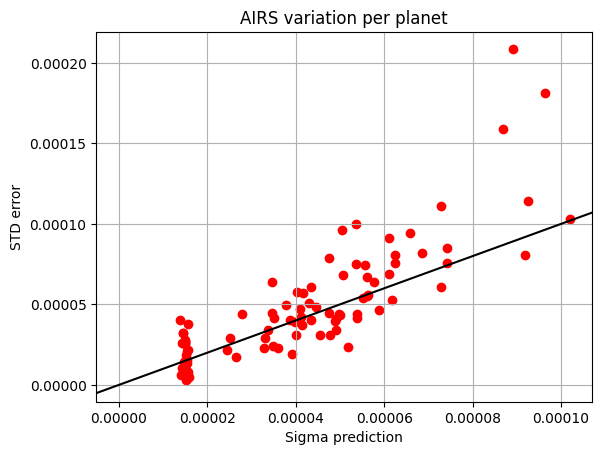

New preprocessing
[0.9998716787678492, 1.0023673013553973]
[6.2740285188194e-05, 4.6590619249923474e-05]
[1.480833664408889, 2.4174869984446024]
Score:          0.5447
RMS error FGS:  137.79 ppm
RMS error AIRS: 161.99 ppm

20
Score:          0.5428
RMS error FGS:  104.34 ppm
RMS error AIRS: 168.00 ppm

No fudge
Score:          0.3697
RMS error FGS:  137.79 ppm
RMS error AIRS: 161.99 ppm


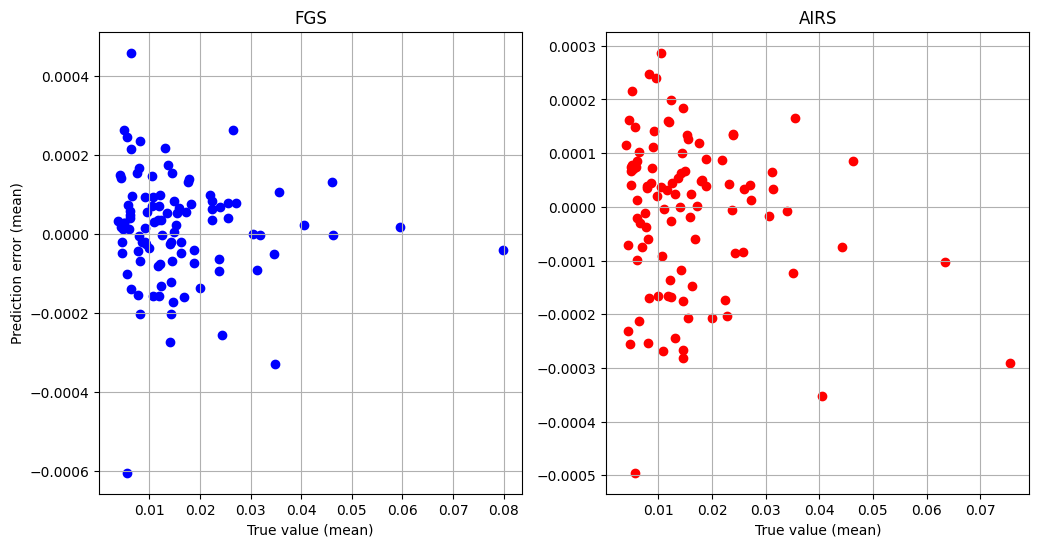

FGS
94572221, ratio:6.414, x:7.721e-05, y:-4.952e-04, RMS:4.958e-04
275657872, ratio:3.566, x:7.175e-05, y:-2.558e-04, RMS:2.798e-04
174918899, ratio:3.556, x:7.923e-05, y:-2.817e-04, RMS:3.176e-04
225960008, ratio:3.279, x:1.077e-04, y:-3.533e-04, RMS:3.677e-04
23615382, ratio:3.246, x:8.219e-05, y:-2.668e-04, RMS:3.099e-04
AIRS
94572221, ratio:11.984, x:4.133e-05, y:-4.952e-04, RMS:4.958e-04
174918899, ratio:6.725, x:4.189e-05, y:-2.817e-04, RMS:3.176e-04
225960008, ratio:6.155, x:5.739e-05, y:-3.533e-04, RMS:3.677e-04
275657872, ratio:6.070, x:4.215e-05, y:-2.558e-04, RMS:2.798e-04
219831567, ratio:5.636, x:3.664e-05, y:-2.065e-04, RMS:2.289e-04


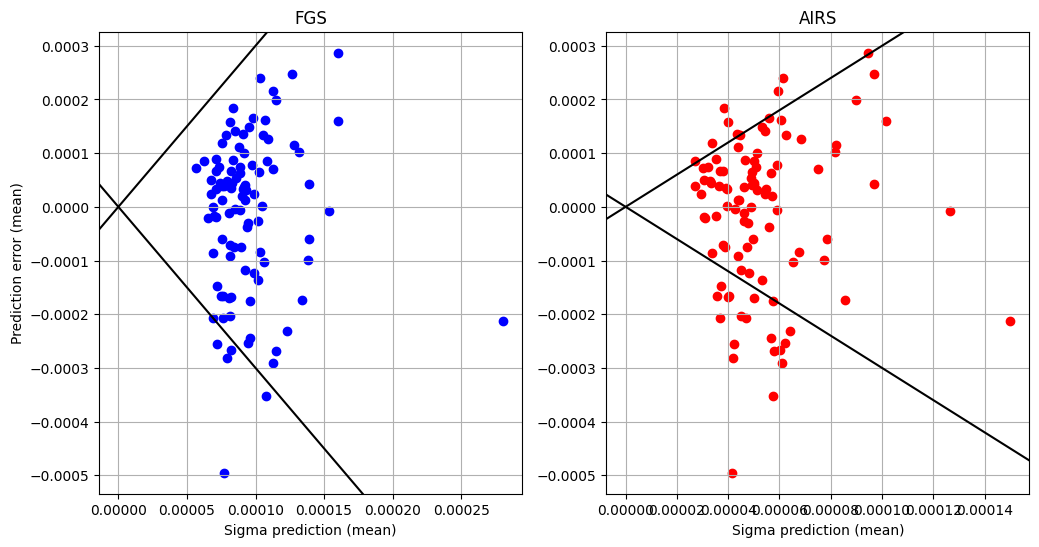

AIRS variation
199812582, ratio:2.991, x:1.392e-05, y:4.163e-05, RMS:4.594e-05
174918899, ratio:2.889, x:5.090e-05, y:1.470e-04, RMS:3.176e-04
204264160, ratio:2.707, x:8.771e-05, y:2.374e-04, RMS:3.748e-04
37139319, ratio:2.575, x:5.912e-05, y:1.522e-04, RMS:2.270e-04
173186906, ratio:2.569, x:5.040e-05, y:1.295e-04, RMS:2.118e-04


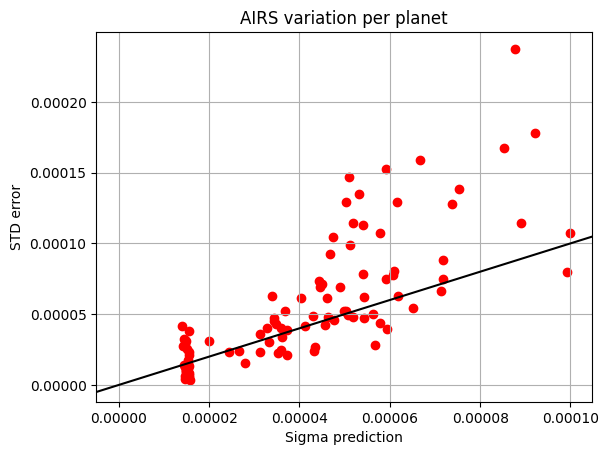

Baseline GP, holes
[0.9820808126020505, 0.9883389147930165]
[0.0004951488630769779, 0.00033304449418947857]
[10.445050484202515, 11.159477487735913]
Score:          0.3385
RMS error FGS:  1073.31 ppm
RMS error AIRS: 449.81 ppm

20
Score:          0.3738
RMS error FGS:  1037.28 ppm
RMS error AIRS: 221.52 ppm

No fudge
Score:          -7.2181
RMS error FGS:  1073.31 ppm
RMS error AIRS: 449.81 ppm


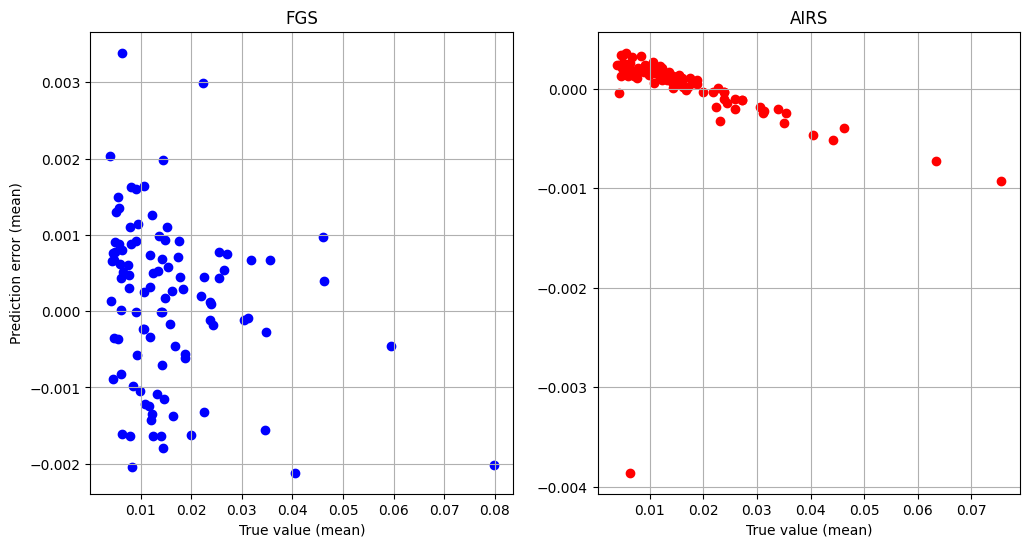

FGS
158006264, ratio:10.240, x:3.771e-04, y:-3.861e-03, RMS:3.860e-03
204264160, ratio:7.018, x:1.319e-04, y:-9.258e-04, RMS:9.545e-04
340799832, ratio:5.523, x:1.311e-04, y:-7.243e-04, RMS:7.472e-04
278687207, ratio:5.500, x:9.351e-05, y:-5.143e-04, RMS:5.255e-04
39930063, ratio:3.857, x:9.383e-05, y:3.619e-04, RMS:3.629e-04
AIRS
158006264, ratio:130.840, x:2.951e-05, y:-3.861e-03, RMS:3.860e-03
204264160, ratio:14.038, x:6.595e-05, y:-9.258e-04, RMS:9.545e-04
278687207, ratio:10.862, x:4.735e-05, y:-5.143e-04, RMS:5.255e-04
327141313, ratio:9.398, x:2.720e-05, y:2.557e-04, RMS:2.612e-04
340799832, ratio:9.243, x:7.836e-05, y:-7.243e-04, RMS:7.472e-04


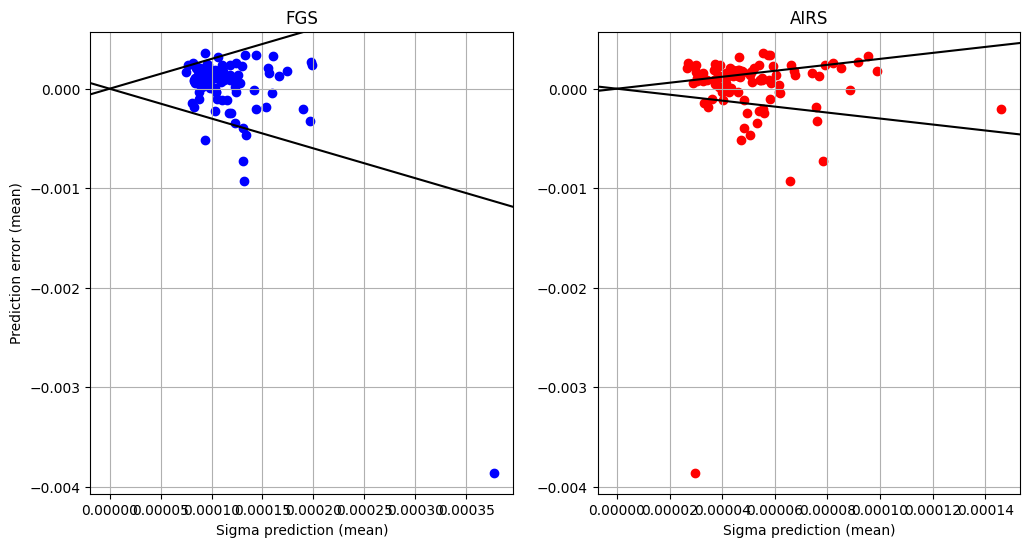

AIRS variation
199812582, ratio:2.853, x:1.385e-05, y:3.949e-05, RMS:1.121e-04
255788262, ratio:2.628, x:1.471e-05, y:3.868e-05, RMS:1.860e-04
204264160, ratio:2.328, x:8.880e-05, y:2.067e-04, RMS:9.545e-04
233844444, ratio:2.323, x:1.437e-05, y:3.337e-05, RMS:5.826e-05
93251999, ratio:2.121, x:1.437e-05, y:3.047e-05, RMS:1.083e-04


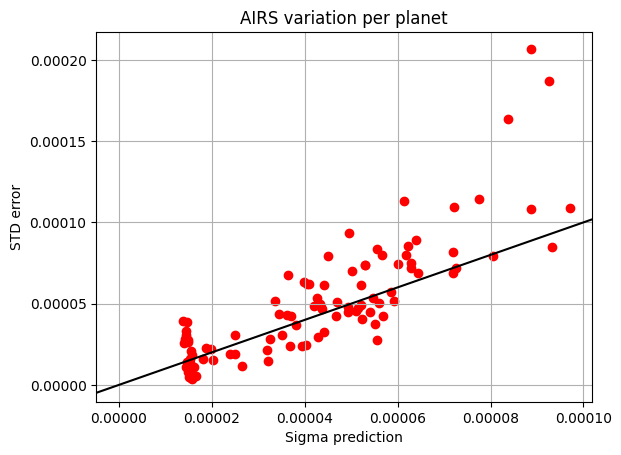

New preprocessing, holes
[0.9826487541121905, 0.9857689066269817]
[0.0004853310502938915, 0.0003694131483558962]
[8.457073465520935, 11.611265550073249]
Score:          0.3351
RMS error FGS:  989.25 ppm
RMS error AIRS: 481.24 ppm

20
Score:          0.3692
RMS error FGS:  990.40 ppm
RMS error AIRS: 273.22 ppm

No fudge
Score:          -7.4216
RMS error FGS:  989.25 ppm
RMS error AIRS: 481.24 ppm


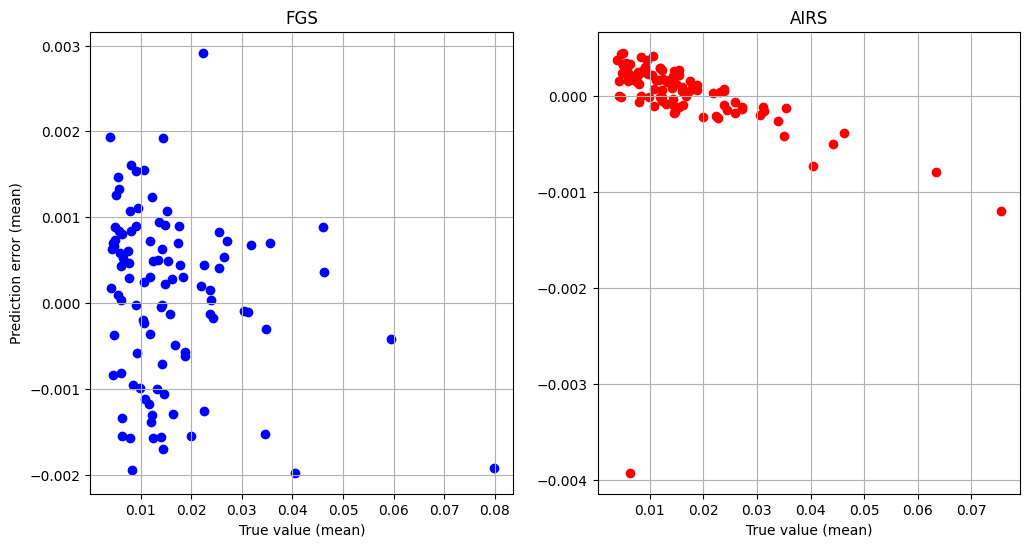

FGS
158006264, ratio:19.007, x:2.065e-04, y:-3.924e-03, RMS:3.918e-03
204264160, ratio:8.882, x:1.348e-04, y:-1.198e-03, RMS:1.224e-03
340799832, ratio:6.374, x:1.251e-04, y:-7.976e-04, RMS:8.180e-04
225960008, ratio:5.332, x:1.374e-04, y:-7.329e-04, RMS:7.545e-04
278687207, ratio:4.764, x:1.046e-04, y:-4.982e-04, RMS:5.050e-04
AIRS
158006264, ratio:130.860, x:2.999e-05, y:-3.924e-03, RMS:3.918e-03
204264160, ratio:20.341, x:5.888e-05, y:-1.198e-03, RMS:1.224e-03
340799832, ratio:13.160, x:6.061e-05, y:-7.976e-04, RMS:8.180e-04
225960008, ratio:13.001, x:5.637e-05, y:-7.329e-04, RMS:7.545e-04
278687207, ratio:11.741, x:4.243e-05, y:-4.982e-04, RMS:5.050e-04


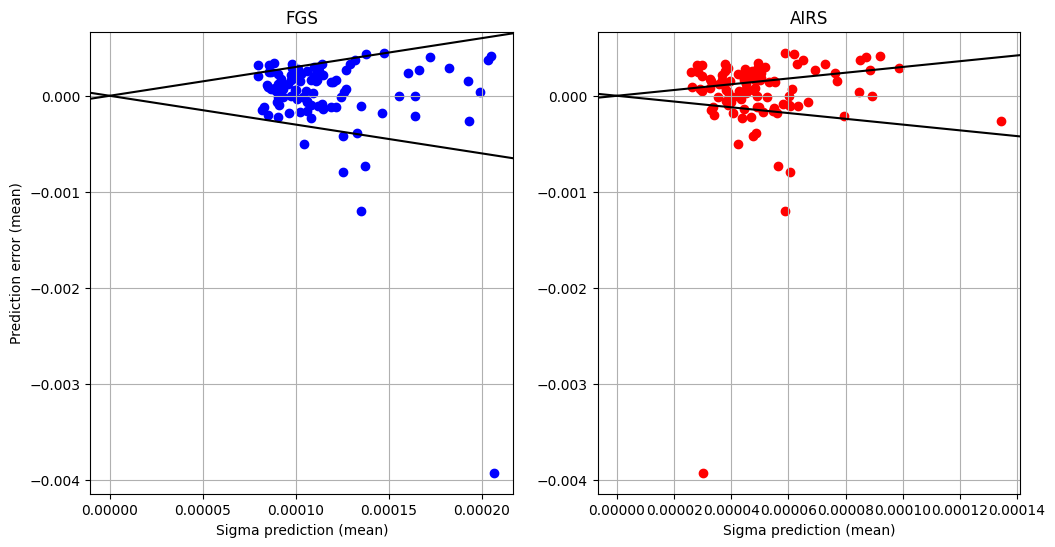

AIRS variation
199812582, ratio:2.960, x:1.383e-05, y:4.094e-05, RMS:6.714e-05
174918899, ratio:2.883, x:4.828e-05, y:1.392e-04, RMS:2.433e-04
37139319, ratio:2.847, x:5.536e-05, y:1.576e-04, RMS:1.830e-04
173186906, ratio:2.742, x:4.882e-05, y:1.339e-04, RMS:1.726e-04
275657872, ratio:2.722, x:5.442e-05, y:1.481e-04, RMS:1.564e-04


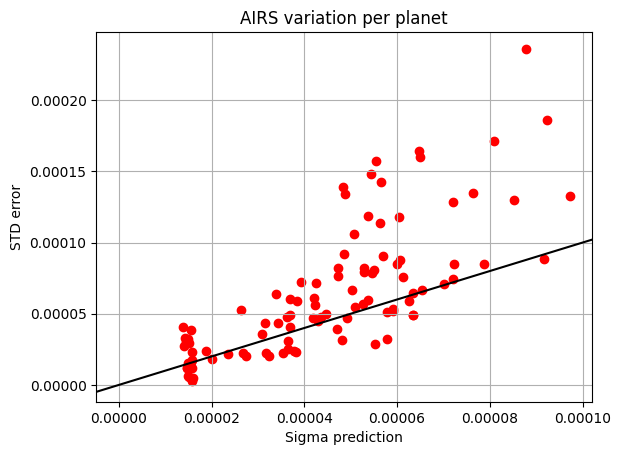

In [5]:
def basics():
    plt.grid(True)
    plt.box(True)
def plot_two_sensors(func, xl, yl, mod):
    _,ax = plt.subplots(1,2,figsize=(12,6))
    plt.sca(ax[0]);basics()
    plt.title('FGS')
    plt.xlabel(xl)
    plt.ylabel(yl)
    func(slice(0,1), 'blue', 'FGS')
    mod()
    
    plt.sca(ax[1]);basics()
    plt.title('AIRS')
    plt.xlabel(xl)
    func(slice(1,283), 'red', 'AIRS')
    mod()
    
    plt.pause(0.001)

def report_extreme_ratios(x,y,name):
    print(name)
    inds = np.argsort(np.abs(y/x))[::-1]
    for ii in inds[:5]:
        print(f'{inferred_data[ii].planet_id}, ratio:{np.abs(y[ii]/x[ii]):.3f}, x:{x[ii]:.3e}, y:{y[ii]:.3e}, RMS:{kgs.rms(error_matrix[ii,:]):.3e}')
    
    
for k,v in todo.items():
    (inferred_data,model,_) = kgs.dill_load(fname(k))
    #model.bias_a[0]+=0.006
    #model.bias_a[1]-=0.0002
    #inferred_data = model.infer(train_data)
    print(k)
    print(model.bias_a)
    print(model.bias_b)
    print(model.sigma_fudge)
    kgs.score_metric(inferred_data, train_data)
    print('')
    print('20')
    kgs.score_metric(inferred_data[:20], train_data[:20]) 
    print('')
    print('No fudge')
    model.sigma_fudge = [1,1]
    # model.bias_a = [1,1]
    # model.bias_b = [0,0]
    # print('!!!')
    inferred_data = model.infer(train_data)
    kgs.score_metric(inferred_data, train_data)     
    error_matrix = np.array([d.spectrum - t.spectrum for d,t in zip(inferred_data,train_data)])
    true_matrix = np.array([t.spectrum for d,t in zip(inferred_data,train_data)])
    
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(true_matrix[:,slic],1)
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        
    plot_two_sensors(plot_prediction_vs_true, 'True value (mean)', 'Prediction error (mean)', lambda:0)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = [np.sqrt(np.sum(d.spectrum_cov[slic,slic])/(slic.stop-slic.start)**2) for d in inferred_data]
        y = np.mean(error_matrix[:,1:],1)
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)
    def mod():
        plt.axline((0,0), slope=3, color='black')
        plt.axline((0,0), slope=-3, color = 'black')        
    plot_two_sensors(plot_mean_error_vs_sigma, 'Sigma prediction (mean)', 'Prediction error (mean)', mod)
    
    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel('Sigma prediction')
    plt.ylabel('STD error')
    n=282
    x=np.sqrt([(np.trace(d.spectrum_cov[1:,1:]) - np.sum(d.spectrum_cov[1:,1:]) / n) / n for d in inferred_data])
    y=np.sqrt(np.var(error_matrix[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    report_extreme_ratios(x,y,'AIRS variation')    
    plt.pause(0.001)

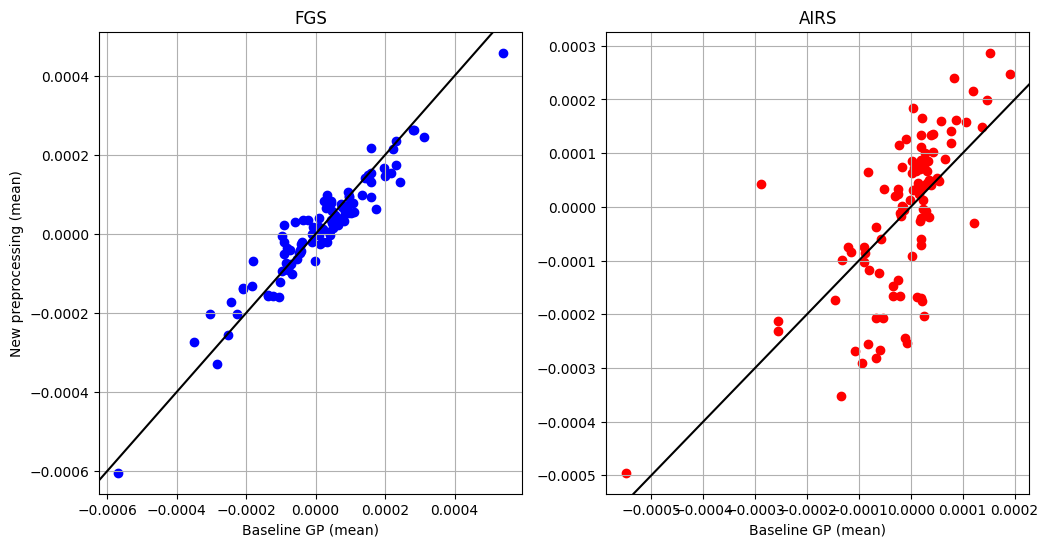

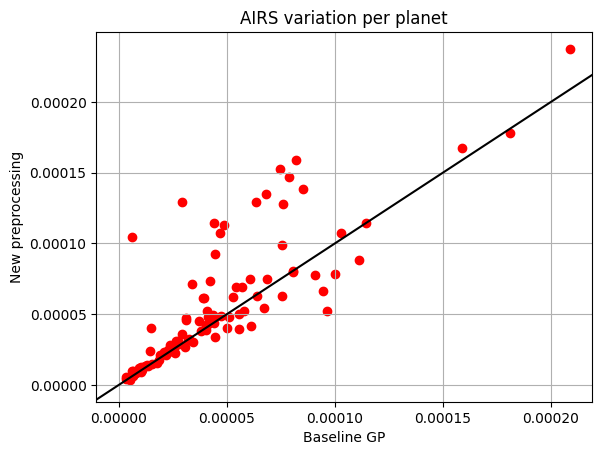

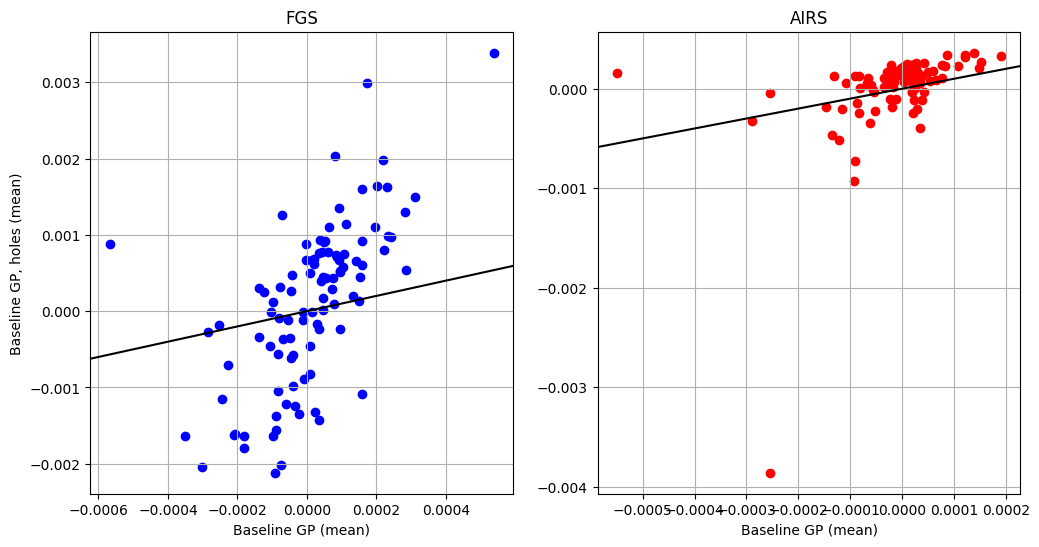

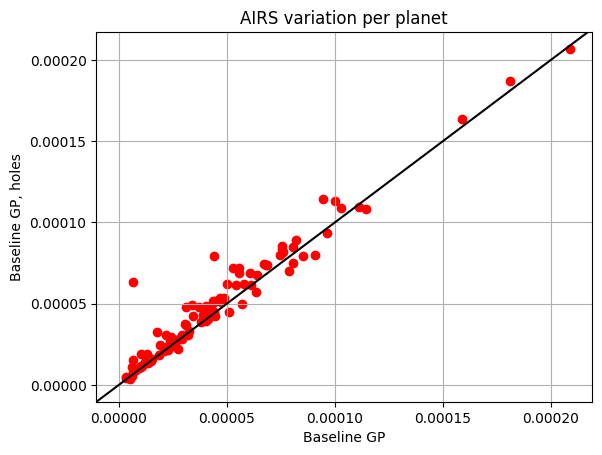

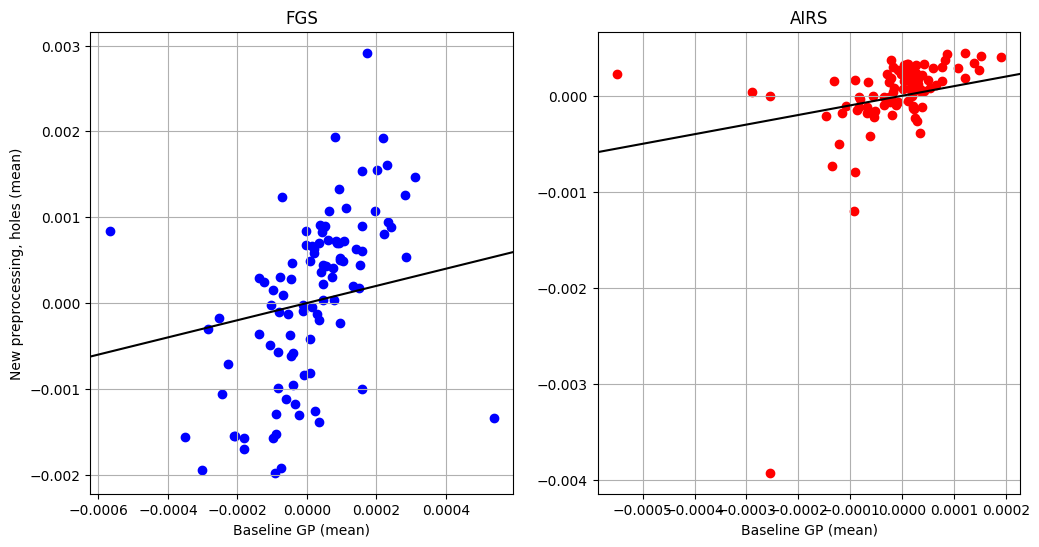

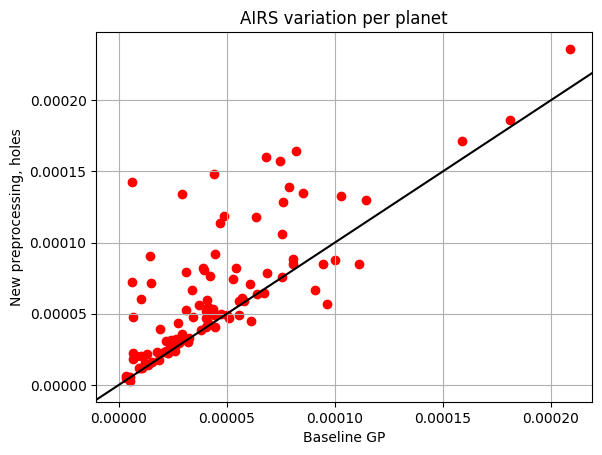

In [6]:
compare1= list(todo.keys())[0]
data1 = kgs.dill_load(fname(compare1))[0]
for k,v in todo.items():    
    compare2= k
    if compare2==compare1:
        continue    
    data2 = kgs.dill_load(fname(compare2))[0]
    error1 = np.array([d.spectrum - t.spectrum for d,t in zip(data1,train_data)])
    error2 = np.array([d.spectrum - t.spectrum for d,t in zip(data2,train_data)])
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(error1[:,slic],1)
        y = np.mean(error2[:,slic],1)
        plt.scatter(x,y,color = col)

    plot_two_sensors(plot_prediction_vs_true, compare1+' (mean)', compare2+' (mean)', lambda:plt.axline((0,0),slope=1,color='black'))

    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel(compare1)
    plt.ylabel(compare2)
    x=np.sqrt(np.var(error1[:,1:],1))
    y=np.sqrt(np.var(error2[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    plt.pause(0.001)